### Домашнее задание №5 к лекции «Задачи классификации и кластеризации»

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, 
                             roc_curve, auc, silhouette_score)

#### Задание.
1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)  
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [2]:
iris = load_iris(as_frame=True)

In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['variety'] = iris.target

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df['variety'].value_counts()

0    50
1    50
2    50
Name: variety, dtype: int64

In [6]:
df_1 = df[['sepal length (cm)', 'sepal width (cm)', 'variety']]

In [7]:
def model(df, filtr=None):
    df = df[df['variety'] != filtr]
    X = df[['sepal length (cm)', 'sepal width (cm)']]
    y = df['variety']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    y_pred = lda.predict(X_test)
    y_proba = lda.predict_proba(X_test)

    metrics = {}
    metrics['Accuracy'] = (accuracy_score(y_test, y_pred))
    metrics['Precision'] = (precision_score(y_test, y_pred, average='weighted'))
    metrics['Recall'] = (recall_score(y_test, y_pred, average='weighted'))
    metrics['F1'] = (f1_score(y_test, y_pred, average='weighted'))
    if filtr is not None:
        metrics['ROC AUC'] = (roc_auc_score(y_test, y_proba[:, 1]))
    else:
        metrics['ROC AUC'] = (roc_auc_score(y_test, y_proba, multi_class='ovo'))
    m = pd.DataFrame.from_dict(metrics, orient='index', columns=['value'])
    display(m)
    result = pd.DataFrame([np.array(y_test), y_pred], index=['test', 'pred']).T.head(20)
    display(result.T)
    
    plt.scatter(
    x = X_test['sepal length (cm)'],
    y = X_test['sepal width (cm)'], 
    c = y_pred)
    plt.scatter(lda.means_[:,0], lda.means_[:,1], c='r', s=100, marker='*')

,value
Accuracy,0.868421
Precision,0.879605
Recall,0.868421
F1,0.865343
ROC AUC,0.943182


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
test,1,0,2,1,1,0,1,2,1,1,2,0,0,0,0,1,2,1,1,2
pred,1,0,2,1,2,0,1,2,1,1,2,0,0,0,0,2,2,1,1,2


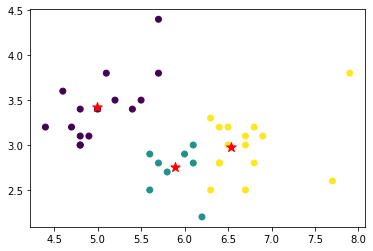

In [8]:
model(df_1)

In [9]:
X = df.drop(['variety'], axis = 1) 
sc = StandardScaler()
X_sc = sc.fit_transform(X)

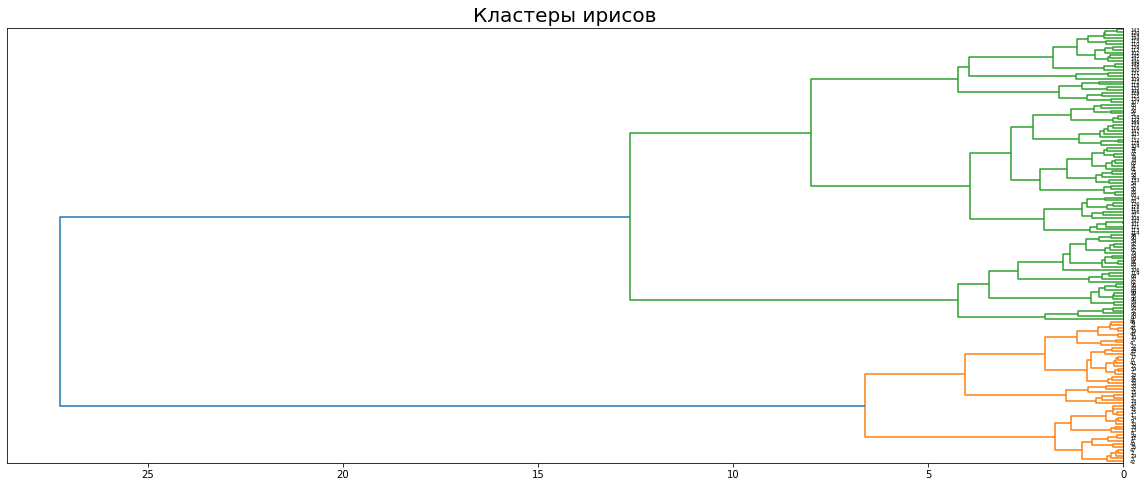

CPU times: user 1.11 s, sys: 53.4 ms, total: 1.17 s
Wall time: 440 ms


In [10]:
%%time
links = linkage(X_sc, method = 'ward')

plt.figure(figsize=(20, 8))
plt.title('Кластеры ирисов', size=20)
dendrogram(links, orientation='left')

plt.show()

In [11]:
for i in range(2,8):
    km = KMeans(n_clusters = i, random_state=0)
    labels = km.fit_predict(X_sc)
    s_score = silhouette_score(X_sc, labels)
    print(f'Для {i} кластеров, silhouette = {s_score:.3f}')

Для 2 кластеров, silhouette = 0.582
Для 3 кластеров, silhouette = 0.460
Для 4 кластеров, silhouette = 0.385
Для 5 кластеров, silhouette = 0.346
Для 6 кластеров, silhouette = 0.322
Для 7 кластеров, silhouette = 0.328


In [12]:
def clust(df, n_clusters = 2):
    X = df.drop(['variety'], axis = 1) 
    sc = StandardScaler()
    X_sc = sc.fit_transform(X)
    km = KMeans(n_clusters = n_clusters, random_state=0)
    labels = km.fit_predict(X)
    df['cluster'] = labels
    plt.scatter(
    x = X['sepal length (cm)'],
    y = X['sepal width (cm)'], 
    c = labels)

    centers = km.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='r', s=200, marker='*')

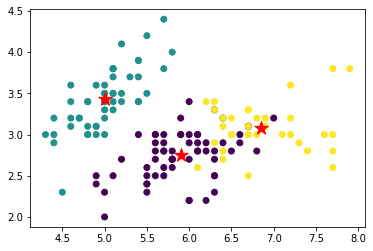

In [13]:
clust(df, n_clusters = 3)

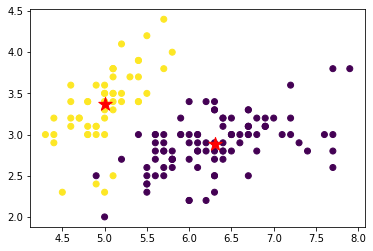

In [14]:
clust(df, n_clusters = 2)

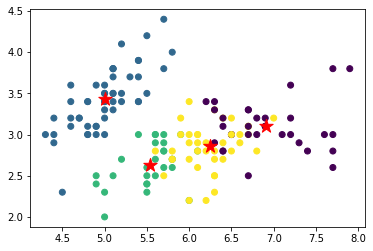

In [15]:
clust(df, n_clusters = 4)